In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")


In [17]:
# Load and clean data

# Load the dataset with specified encoding
data_path = 'spam.csv'  # Replace with your dataset path
data = pd.read_csv(data_path, encoding='ISO-8859-1')

# Keep relevant columns and rename them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Display first few rows to verify
print(data.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [25]:
# Print summary statistics of the message column
print('Summary Statistics of the message column for the DataFrame are as follows:')
print('-'*100)
print(data['message'].describe(include='object'))


Summary Statistics of the message column for the DataFrame are as follows:
----------------------------------------------------------------------------------------------------
count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: message, dtype: object


In [26]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 0 numerical features : []

We have 3 categorical features : ['label', 'message', 'cleaned_message']


In [29]:
# Stemming Function for Text Preprocessing

porter_stemmer = PorterStemmer()

In [30]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [porter_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [34]:
data['message'] = data['message'].apply(stemming)
data['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

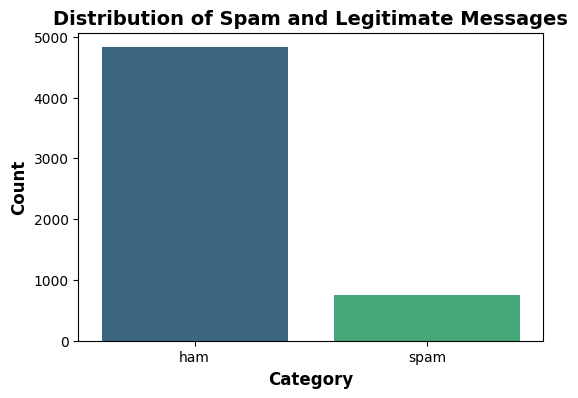

In [18]:
# Visualize data distribution

# Plot the distribution of spam and legitimate messages
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='viridis')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Spam and Legitimate Messages', fontsize=14, fontweight='bold')
plt.show()


In [19]:
# Preprocess text data

# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
data['cleaned_message'] = data['message'].apply(clean_text)

# Split data into training and testing sets
X = data['cleaned_message']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Train and Evaluate models

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='spam')
    recall = recall_score(y_test, y_pred, pos_label='spam')
    f1 = f1_score(y_test, y_pred, pos_label='spam')

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

    return accuracy, precision, recall, f1


In [21]:
# TF-IDF Vectorization and Model Training

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_results = evaluate_model(nb_model, X_test_tfidf, y_test, "Naive Bayes (TF-IDF)")

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_results = evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression (TF-IDF)")

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_results = evaluate_model(svm_model, X_test_tfidf, y_test, "SVM (TF-IDF)")


Naive Bayes (TF-IDF) Performance:
Accuracy: 0.9524663677130045
Precision: 1.0
Recall: 0.6466666666666666
F1 Score: 0.7854251012145749


Logistic Regression (TF-IDF) Performance:
Accuracy: 0.9623318385650225
Precision: 1.0
Recall: 0.72
F1 Score: 0.8372093023255813


SVM (TF-IDF) Performance:
Accuracy: 0.9802690582959641
Precision: 1.0
Recall: 0.8533333333333334
F1 Score: 0.9208633093525179




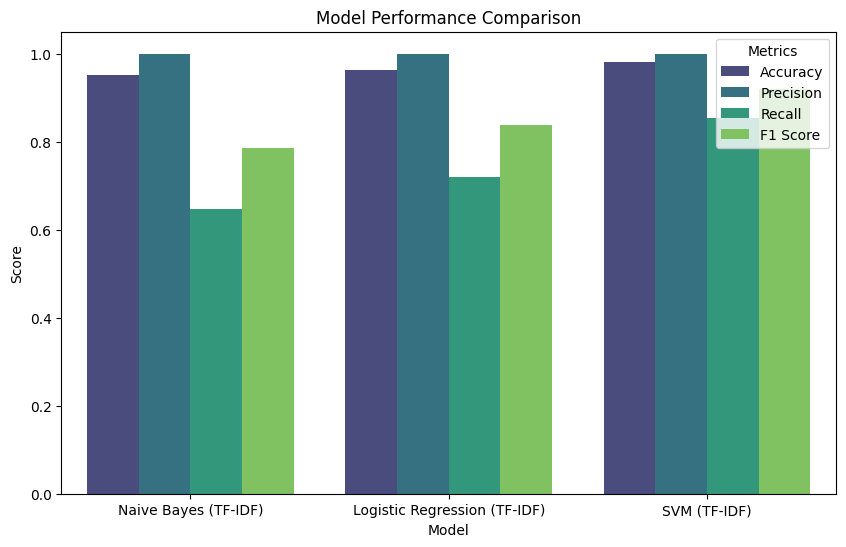

In [22]:
# Visualize and Compare Results

# Store results
results = {
    'Model': ['Naive Bayes (TF-IDF)', 'Logistic Regression (TF-IDF)', 'SVM (TF-IDF)'],
    'Accuracy': [nb_results[0], lr_results[0], svm_results[0]],
    'Precision': [nb_results[1], lr_results[1], svm_results[1]],
    'Recall': [nb_results[2], lr_results[2], svm_results[2]],
    'F1 Score': [nb_results[3], lr_results[3], svm_results[3]]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(10, 6))
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metrics', loc='upper right')
plt.show()


In [23]:
# Determine Best Model

# Find the best model based on the highest F1 score
best_model_idx = results_df['F1 Score'].idxmax()
best_model = results_df.iloc[best_model_idx]

print(f"The best model is {best_model['Model']} with F1 Score of {best_model['F1 Score']:.2f}")


The best model is SVM (TF-IDF) with F1 Score of 0.92


# New Section